
## Introducción
La base de datos seleccionada lleva por nombre New_York_City_Leading_Causes_of_Death,generado por el organismo de NYC Opendata esta base de datos cuenta con 7 columnas las cuales son los encabezados y alrededor de 1520 filas, lo que nos muestran estos datos es acerca de las defunciones por distintas causas/enfermedades en la ciudad de NY, especificando la cantidad de muertes por esa causa el año en el que se registraron dichos fallecimientos, el sexo de la persona fallecida y su raza etnia.


Mis variables de interes son: 'Year', 'Leading Cause', 'Sex', 'Race ethnicity', 'Deaths'.
* La variable 'Deaths' es una variable numerica discreta que nos dice el numero de fallecidos 
* La varibale 'Year' es una variable numerica discreta y nos especifica el año en el que se registraron dichas defunciones.
* La variable 'Leading Cause' es una variable categorica y nos dice cual fue la razón/causa de dicha defunción.
* La variable 'Sex' es una varibale categorica representa si la persona fallecida es hombre o mujer
* La variabe 'Race Ethnicity' es una variable categorica depende de la raza etnia a la que pertenece dicha persona, por ejemplo Hispanic, Asian, Other.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [8]:
df= pd.read_excel('datasets/NYC_Causes_of_Death.xlsx',
                  sheet_name = 'New_York_City_Leading_Causes_of',
                  engine= 'openpyxl')
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander,515,79.7267,78.8654
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,498,77.0949,81.6051
2,2015,Cerebrovascular Disease (Stroke: I60-I69),F,Asian and Pacific Islander,95,14.7069,15.3379
3,2015,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,89,13.778,14.7064
4,2015,Diabetes Mellitus (E10-E14),F,Asian and Pacific Islander,71,10.9914,11.5374


In [9]:
df.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [10]:
df.shape

(1516, 7)

# Pregunta de investigación 1
Segun la base de datos, cual es el genero con la mayor cantidad de fallecidos en la ciudad de NY? Realiza un histograma para observarlo

Text(0, 0.5, 'Cantidad')

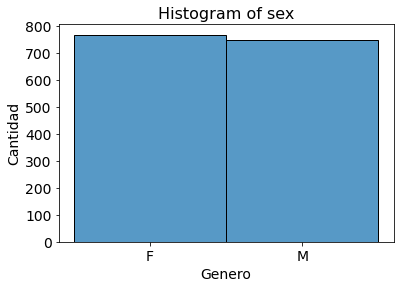

In [12]:
sns.histplot(df['Sex'],
             kde= False).set_title('Histogram of sex', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel('Genero', fontsize = 14)
plt.ylabel('Cantidad', fontsize = 14)

In [13]:
df['Sex']

0       F
1       F
2       F
3       F
4       F
       ..
1511    F
1512    F
1513    F
1514    F
1515    M
Name: Sex, Length: 1516, dtype: object

## Conclusión pregunta 1
Como podemos observar en la grafica, el genero con mayor cantidad de fallecidos es 'F' es decir female y en español mujer por alrededor de 18 datos, dando esto un total de f=767 y m= 749  m= Male = Hombre

# Pregunta de investigación 2
¿En que año se registraron mas muertes por raza etnia?


In [14]:
pivote=pd.pivot_table(df,
                      #index = ['Year', 'Race Ethnicity'],
                      index = ['Year'],
                      values= 'Deaths',
                      columns= 'Race Ethnicity',
                      aggfunc= 'sum',
                     )
df2= pivote
df2.head(15)

,Race Ethnicity,Asian and Pacific Islander,Black Non-Hispanic,Hispanic,Non-Hispanic Black,Non-Hispanic White,Not Stated/Unknown,Other Race/ Ethnicity,White Non-Hispanic
Year,,,,,,,,,
2007,Deaths,2874.0,14258.0,8785.0,NaN,NaN,NaN,NaN,27479.0
2008,Deaths,2971.0,14006.0,9329.0,NaN,NaN,NaN,NaN,27131.0
2009,Deaths,3035.0,13775.0,9178.0,NaN,NaN,NaN,NaN,26210.0
2010,Deaths,3157.0,13637.0,9340.0,NaN,NaN,NaN,NaN,25790.0
2011,Deaths,3341.0,13910.0,9391.0,NaN,NaN,NaN,NaN,25549.0
2012,Deaths,3446.0,13864.0,9420.0,NaN,NaN,NaN,NaN,24904.0
2013,Deaths,3651.0,13911.0,9672.0,NaN,NaN,906.0,NaN,24891.0
2014,Deaths,3880.0,13755.0,9687.0,NaN,NaN,NaN,NaN,24533.0
2015,Deaths,4078.0,NaN,10182.0,14178.0,24568.0,977.0,137.0,NaN


Text(0, 0.5, 'Años')

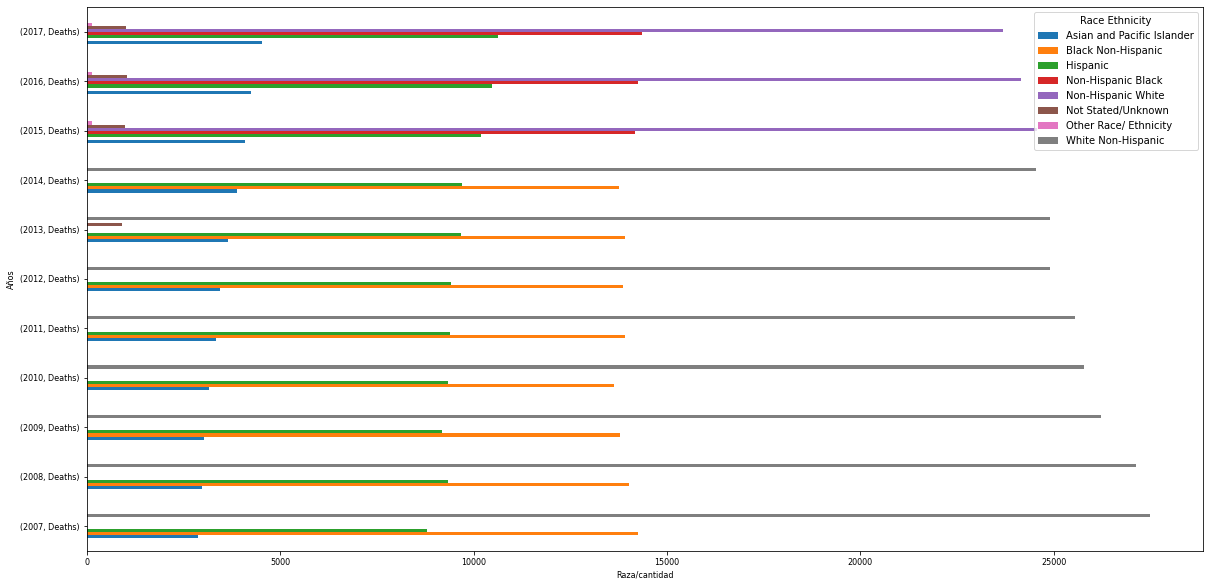

In [16]:
df2.plot(kind = 'barh', figsize = (20, 10))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xlabel('Raza/cantidad', fontsize = 8)
plt.ylabel('Años', fontsize = 8)


## Conclusión pregunta 2
Como podemos observar en la grafica de arriba, en todos los años se preseta una mayor cantidad de fallecidos de la raza etnia 'Blanco no hispano' solamente que del 2007 al 2014 esta escrito diferente al de 2015 a 2017.

# Pregunta 3
¿En que año del 2014 al 2017 se registraron mas muertes y que genero es la mayoria?

In [17]:
df3=pd.pivot_table(df,
                           #index= ['Year','Sex'],
                           index= 'Year',
                           values='Deaths',
                           aggfunc='sum',
                           columns = 'Sex',
                           
                          )
df3

,Sex,F,M
Year,,,
2014,Deaths,NaN,26090.0
2015,Deaths,27515.0,26605.0
2016,Deaths,27208.0,27072.0
2017,Deaths,27165.0,27154.0


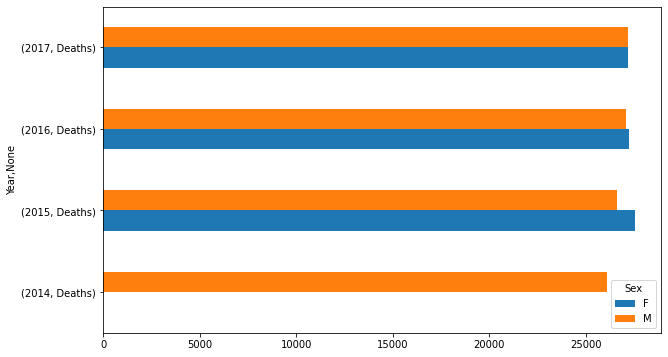

In [18]:
df3.plot(kind = 'barh', figsize = (10, 6))
#df[['Year', 'Deaths']]

## Conclusion pregunta 3
Como se puede observar en la grafica el año en el que se registran mas muertes es el 2015 siendo el genero de Female

# Introduccion a la nueva base de datos
Esta base de datos nos muestra una tabla de suministros de oficina por region y cuales son los materiales mas solicitados, sus costos y el precio total por la compra de los materiales. Cuenta con 7 columnas y 44 filas y esta base de datos se obtuvo de https://www.contextures.com/xlsampledata01.html

Mis variables de interes son:
* OrderDate: Es una variable numerica continua que representa las fechas de los pedidos
* Region: Es una variable categorica que nos dice la region en donde se realizo el pedido
* Rep: Es una variable categortica que nos dice el nombre de la persona que hizo el pedido
* Item: Variable categorica que espeficica el producto
* Units: Variable numerica que nos dice la cantidad de unidades que se pidieron de dicho producto
* UnitCost: Variable numerica que menciona el costo unitario de cada producto
* Total: Variable numerica con el total de la compra de productos

In [19]:
df= pd.read_excel('datasets/SampleData.xlsx',
                  sheet_name = 'SalesOrders',
                  engine= 'openpyxl')
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,95,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


## Pregunta 4 

¿Cual es el impacto de Units en Total

Total = b0+ b1*Units

In [20]:
modelA = sm.OLS.from_formula('Total ~ Units', data = df)
resultA= modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8.193
Date:                Fri, 03 Dec 2021   Prob (F-statistic):            0.00660
Time:                        02:10:36   Log-Likelihood:                -319.00
No. Observations:                  43   AIC:                             642.0
Df Residuals:                      41   BIC:                             645.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.2953    122.033      1.289      0.205     -89.155     403.746
Units          6.0651      2.119      2.862      0.007       1.786      10.345
==============================================================================
Omnibus:                        8.971   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.505
Skew:                           1.072   Prob(JB):                       0.0142
Kurtosis:                       3.383   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones
* Variable dependiente: Total
* Variable independiente: Units
* R-squared: 0.167 por lo tanto, este modelo no es tan eficiente. Porque explica solo el 16% del total basado en unidades
* Df model: 1
* Intercept .... > 0.05 no es estadisiticamente significativo
* Salary = 157.29 + 6.0651*Units

In [21]:
print('Cual es el precio de pedir 27 unidades   ', 157.29 + 6.0651*27)
df.iloc[:4, :]

Cual es el precio de pedir 27 unidades    321.04769999999996


,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,95,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73


In [22]:
print('Diferencia es : ', 539.73-321.047)


Diferencia es :  218.683


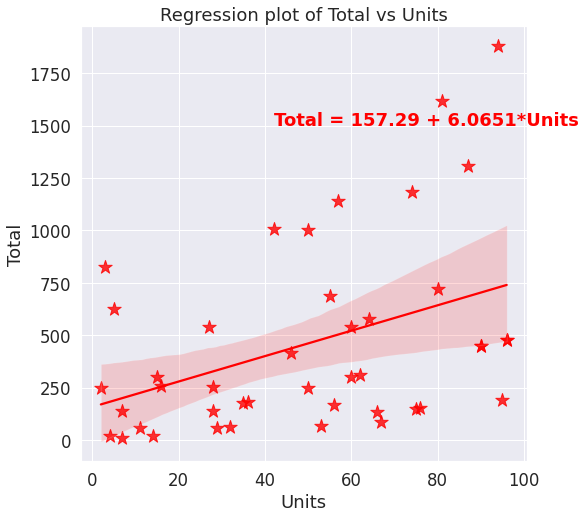

In [23]:
plt.figure(figsize= (8,8))
sns.set(font_scale= 1.5)

reg_plot = sns.regplot(x = 'Units',
            y= 'Total',
            data= df,
            marker = '*',
            color = 'red',
           scatter_kws = {'s':200}
           )
reg_plot.set_title('Regression plot of Total vs Units')
reg_plot.text(42,1500, 'Total = 157.29 + 6.0651*Units',
              color= 'red',
              weight = 'semibold'
             )
plt.show()

In [24]:
RESIA = resultA.resid
RESIA

0     -544.434481
1      538.947225
2     -196.000689
3      218.675653
4     -329.503669
5     -221.804265
6     -462.931501
7     -254.058736
8     -287.700092
9       18.195735
10    -254.058736
11    -275.474645
12     970.617605
13    -194.925540
14      80.574378
15       1.502292
16     -75.399496
17      29.895139
18      51.577441
19    -260.509630
20    -477.230308
21     577.143648
22     -22.752179
23     620.036711
24    -161.595920
25     -59.821367
26    -211.052775
27    -426.255159
28    -260.509630
29    -410.378222
30      76.692754
31     437.378931
32    -223.954563
33     196.071480
34     593.868417
35     649.509229
36    -190.721367
37    -467.006650
38     636.421182
39    -224.147410
40    -169.121963
41    1151.640668
42    -187.399496
dtype: float64

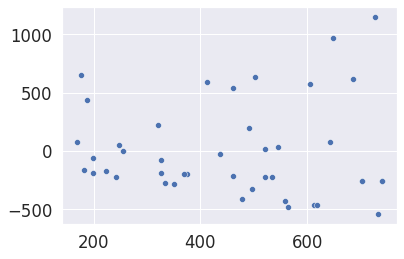

In [25]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y= RESIA)

## Conlusiones
El total depende muy poco en la variable units debido a que son otros factores los que afectan el total.
y se puede observar en el diagrama de dispersión que no existe una linea de tendencia en los residuos

# Pregunta 5 
¿Cual es el porcentaje de item que mas se vende? Realiza un pie chart y una grafica de barras

In [45]:
counts = df['Item'].value_counts()
counts= counts.to_frame()
counts['%']= counts.loc[:,'Item']/counts.loc[:,'Item'].sum(axis=0)*100
counts

,Item,%
Binder,15,34.883721
Pencil,13,30.232558
Pen Set,7,16.279070
Pen,5,11.627907
Desk,3,6.976744


In [46]:
#counts = counts.reindex(['Binder', 'Pencil','Pen Set', 'Pen', 'Desk'])
#counts
counts= counts.reset_index()
counts

,index,Item,%
0,Binder,15,34.883721
1,Pencil,13,30.232558
2,Pen Set,7,16.279070
3,Pen,5,11.627907
4,Desk,3,6.976744


In [47]:
counts=counts.rename({'index': 'Items'},
                     axis = 1
                    )
counts

,Items,Item,%
0,Binder,15,34.883721
1,Pencil,13,30.232558
2,Pen Set,7,16.279070
3,Pen,5,11.627907
4,Desk,3,6.976744


In [48]:
counts=counts.rename({'Item': 'Numero de items'},
                     axis = 1
                    )
counts

,Items,Numero de items,%
0,Binder,15,34.883721
1,Pencil,13,30.232558
2,Pen Set,7,16.279070
3,Pen,5,11.627907
4,Desk,3,6.976744


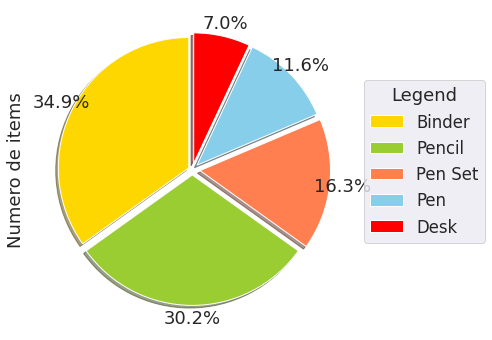

In [90]:
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue','red']
explode_list= [0.03, 0.04, 0.06, 0.05, 0.05]
counts['Numero de items'].plot(kind= 'pie',
                  figsize =(15,6),
                   startangle= 90,
                   labels= None,
                   autopct= '%1.1f%%',
                   pctdistance= 1.1,
                   colors= color_list,
                   explode = explode_list,
                   shadow = True
                  )
plt.legend(labels =counts.Items,
          bbox_to_anchor= (1.0, 0.8),
           title= 'Legend'
           #title_fontsize=5
          )


## Conclusiones
Como podemos ver en el diagrama de pastel el item que mas se pide es el binder por lo que necesitamos buscar el precio mas barato y pedirlos de ahi

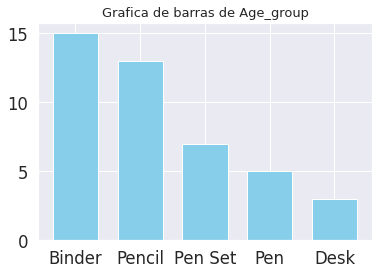

In [91]:
x =list(counts['Items'])
y =list(counts['Numero de items'])

plt.bar(x,y, width = 0.7 , color = 'skyblue')
plt.title('Grafica de barras de Age_group', fontsize= 13)
plt.show()

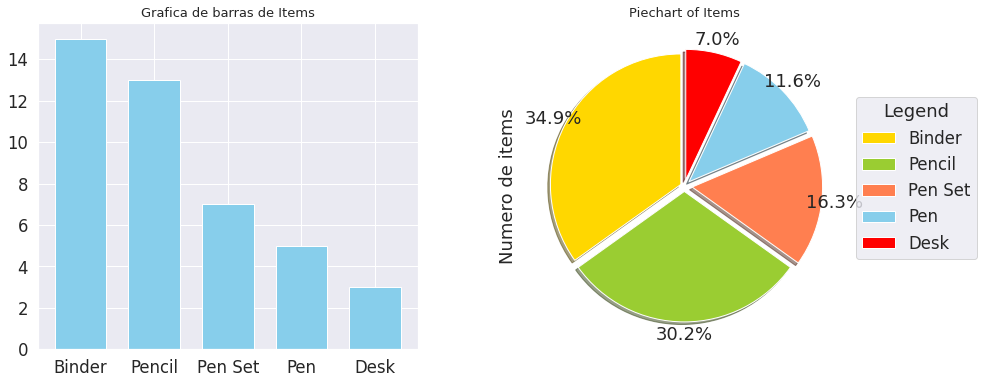

In [96]:
plt.subplot( 1,2,1)
x =list(counts['Items'])
y =list(counts['Numero de items'])

plt.bar(x,y, width = 0.7 , color = 'skyblue')
plt.title('Grafica de barras de Items', fontsize= 13)


plt.subplot(1,2,2)
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue','red']
explode_list= [0.03, 0.04, 0.06, 0.05, 0.05]
counts['Numero de items'].plot(kind= 'pie',
                  figsize =(15,6),
                   startangle= 90,
                   labels= None,
                   autopct= '%1.1f%%',
                   pctdistance= 1.1,
                   colors= color_list,
                   explode = explode_list,
                   shadow = True
                  )
plt.legend(labels =counts.Items,
          bbox_to_anchor= (1.0, 0.8),
           title= 'Legend'
           #title_fontsize=5
          )
plt.title('Piechart of Items', fontsize=13)
#plt.savefig('outputs/Age_group.png')

plt.show()

# Pregunta 6
¿Cual es el impacto de Items, Units en Total

Total = b0 + b2*Items + b3*Units

In [107]:
modelB = sm.OLS.from_formula('Total~Item + Units', data = df)
resultB = modelD.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     7.026
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000105
Time:                        04:20:52   Log-Likelihood:                -308.57
No. Observations:                  43   AIC:                             629.1
Df Residuals:                      37   BIC:                             639.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         221.8264    128.657      1.724      0.093     -38.857     482.509
Item[T.Desk]      315.9841    232.728      1.358      0.183    -155.568     787.536
Item[T.Pen]      -294.1039    176.749     -1.664      0.105    -652.232      64.024
Item[T.Pen Set]  -114.6250    156.974     -0.730      0.470    -432.685     203.435
Item[T.Pencil]   -534.3782    129.965     -4.112      0.000    -797.711    -271.045
Units               8.6569      1.948      4.443      0.000       4.709      12.605
==============================================================================
Omnibus:                        3.229   Durbin-Watson:                   2.340
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.956
Skew:                           0.628   Prob(JB):                        0.228
Kurtosis:                       2.730   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones
* Variable dependiente: Total
* Variable independiente: Item, Units
* R-squared: 0.487 se puede decir que este modelo, no es suficiente eficiente. Debido a que solamente explica solo el 48% Total basado en Item y Units
* Df model: 2
* Intercept .... > 0.05 no es estadisiticamente significativo
* Total = 221.8264 + 315.9841 Item + 8.6569*Units

In [119]:
print('Cual es el precio total de 3 unidades del item Desk   :',221.8264 + 315.9841 + 8.6569*3)

Cual es el precio total de 3 unidades del item Desk   : 563.7812


In [120]:
df.iloc[34:38, :]

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
34,2020-08-07,Central,Kivell,Pen Set,42,23.95,1005.90
35,2020-08-24,West,Sorvino,Desk,3,275.00,825.00
36,2020-09-10,Central,Gill,Pencil,7,1.29,9.03
37,2020-09-27,West,Sorvino,Pen,76,1.99,151.24


## Conclusiones
Debido a que el modelo no es tan certero, existe una variacion entre los resultados verdaderos y los estimados